In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.metrics import confusion_matrix
import pickle
file_path='F:/math/mathorcup/2023mathorcup/datafeatures2.csv'#这是数据增强后的数据特征文件datafeatures2.csv路径
data = pd.read_csv(file_path,skiprows=0)
features = data.to_numpy()
labels = np.array([1] * 3990 + [0] * 525)
print(features)

[[ 0.6300827   0.575948   -3.9134822  ... -4.931103    7.237606
  -0.16001666]
 [-1.6996645  -4.4151707  -0.20747428 ... -8.021051    2.136887
   2.051202  ]
 [ 1.6245445   0.93591267 -3.2725034  ... -0.20589118  4.6688266
   1.0232313 ]
 ...
 [-3.694223   -3.689556    2.0390875  ... -2.9381685  -3.1209657
   3.770898  ]
 [-3.5480382  -4.290136    2.296303   ... -2.082106   -1.0900358
   3.9055407 ]
 [-6.6065564  -4.780238    3.2392716  ... -2.3520887  -1.3894076
   3.4264963 ]]


In [5]:
# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#前200个重要特征
importances=[306,  28, 984, 937, 316, 775, 631, 378, 286, 543, 516, 144, 374, 375, 150, 202, 638, 763,
 750, 946, 986, 529, 972, 497, 114, 958, 261, 444, 502,  49, 404,  13, 697, 418, 247, 789,
 539, 837, 501, 745, 346, 532, 818, 728, 885, 894, 900, 576, 356,  22, 864, 201, 216,  24,
 830, 983, 441,  97, 269, 642, 774, 384, 289, 757, 816,  68,  50, 360, 275, 698, 862, 932,
 183, 415, 172, 998, 348, 517, 500, 425, 166, 773, 740, 779, 907, 557, 445, 382, 315, 329,
  69,  45, 991, 996, 676,  79, 999, 845, 912, 708, 654, 484, 563, 493, 785, 987, 975, 341,
 222, 429,  20, 491, 753, 262, 361, 372, 755, 456, 245, 790,   2, 836, 594,   7, 207, 422,
 448,  39, 510, 244, 718,  58,  34, 754, 343, 595,  81, 792, 651, 109, 727,   4, 472,  65,
 578,   5,  75, 611,  21, 746,  48, 914, 871, 645, 966, 139, 711, 279, 155, 140, 544, 416,
 357, 171, 538, 476, 297, 681, 130, 278, 466, 821, 143, 181, 266, 530,   6, 120, 449, 839,
 137, 106, 268, 102, 672, 807, 527, 330,  56, 342, 782, 362,  25, 780, 781, 961, 417, 854,
 664, 640,]

(4063, 1000)
(452, 1000)
(4063,)
(452,)


In [6]:
#重新训练随机森林分类模型：
with open("F:/math/mathorcup/2023mathorcup/random_forest_model2.pkl", "rb") as f:#这是random_forest_model2.pkl的路径
    loaded_clf2 = pickle.load(f)
start_time = time.time()
loaded_clf2.fit(X_train[:, importances], y_train)
end_time = time.time()
train_time = end_time - start_time

In [8]:
# 使用测试集评估模型性能
y_pred = loaded_clf2.predict(X_test[:, importances])
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

In [9]:
# 输出结果
print("准确率：", accuracy)
print("召回率：", recall)
print("精确率：", precision)
print("F1分数：", f1)
print("训练时间：", train_time)
print("混淆矩阵：", cm)

准确率： 0.9446902654867256
召回率： 0.7882078614257162
精确率： 0.956585983675767
F1分数： 0.847262208885825
训练时间： 12.497355937957764
混淆矩阵： [[ 33  24]
 [  1 394]]


<Axes: >

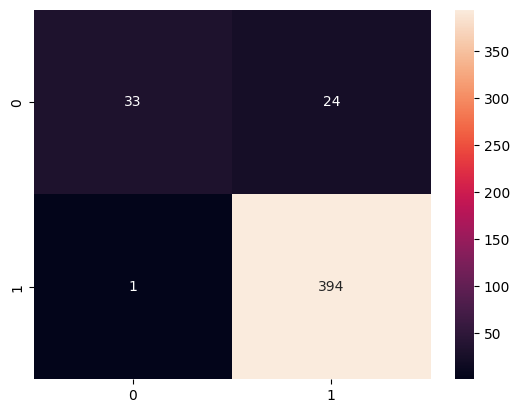

In [10]:
import matplotlib.pyplot as plt
# 可视化混淆矩阵
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')